### These codes are written to generate, from a standard normal distribution, a t-Student distribution with the desired degree of freedom specified here as k. The algorithm used is the rejection and acceptance algorithm, for more information about the rejection and acceptance algorithm, you can refer to this ([link](https://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/node31.html)).



In [2]:
library(tidyverse)
set.seed(1234) # for get same results
k = 5
fun_x <- function(x) dnorm(x)/dt(x, df = k)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


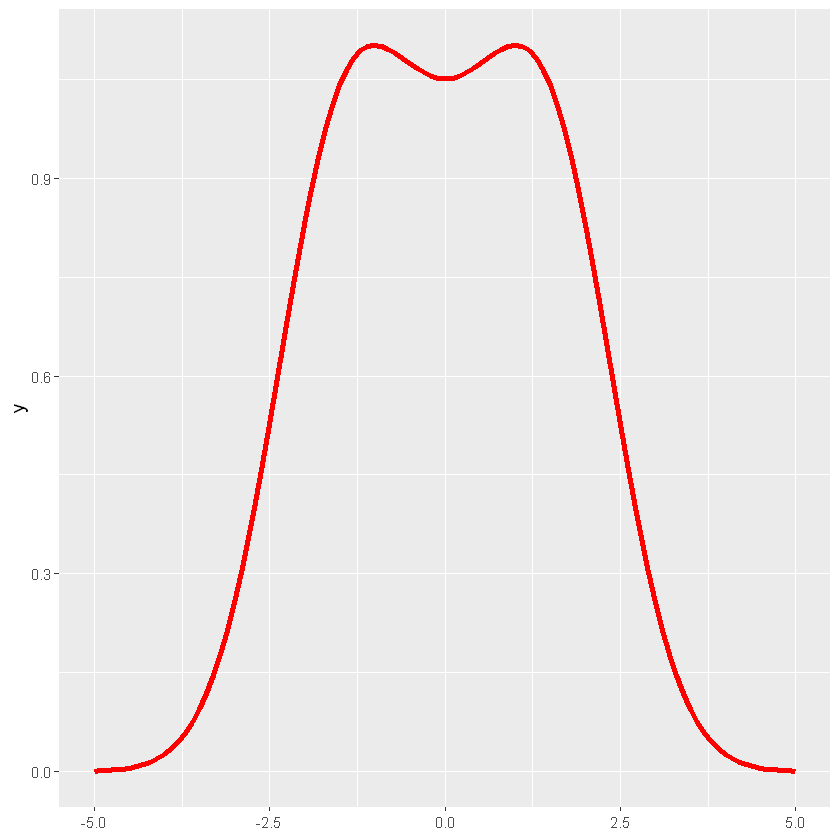

In [3]:
P <- ggplot() + 
stat_function(fun = fun_x, col = "red", size = 1.5, xlim = c(-5, 5))
P

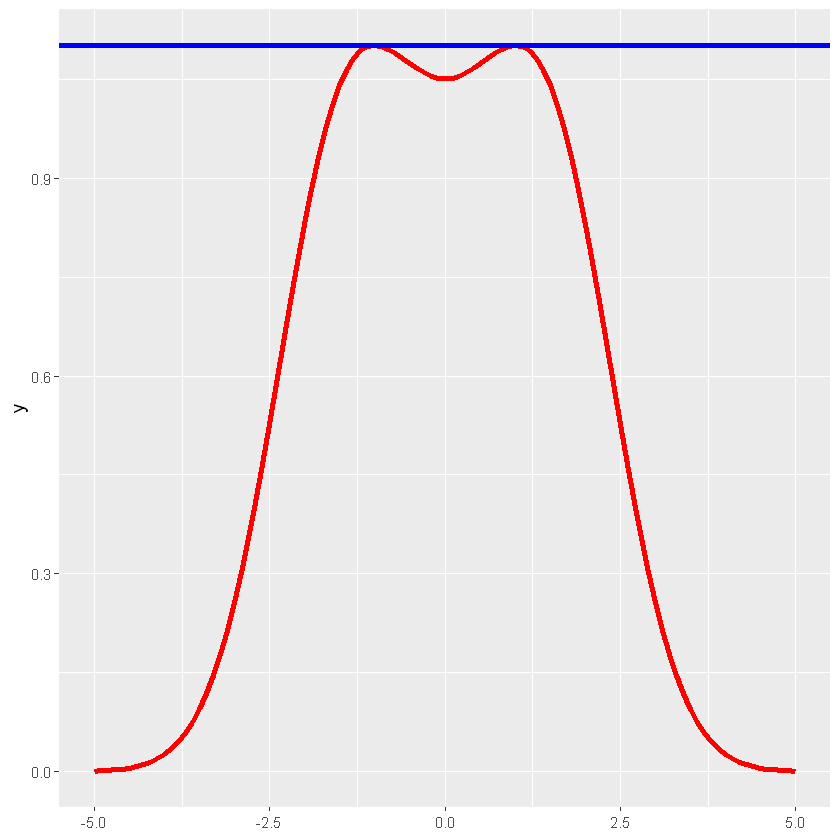

In [4]:
res <- optimize(fun_x, interval = c(-10, 10), maximum = TRUE)
c_point <- res$objective
P + geom_hline(yintercept = c_point, color = "blue", size = 1.5)

In [5]:
Ratio <- function(x) fun_x(x)/c_point



In [6]:
n <- 500 # The arbitrary value we want to simulate from the mentioned distribution.

i = 0
t_result <- c()
while(i <= (n-1)){
    u1 <- rnorm(1)
    u2 <-runif(1)
    if(u2 <= Ratio(u1)){
        i = i + 1
        t_result[i] <- u1
    }
}

In [83]:
head(t_result)


[1] 1.000000e+00 7.530643e-01 2.326764e-01 2.371349e-02 7.680265e-04
[6] 8.012064e-06

In [7]:
tibble(x = t_result) %>%
rstatix :: get_summary_stats(type = "common")



variable,n,min,max,median,iqr,mean,sd,se,ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x,500,-2.73,2.252,0.038,1.212,0.035,0.879,0.039,0.077


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



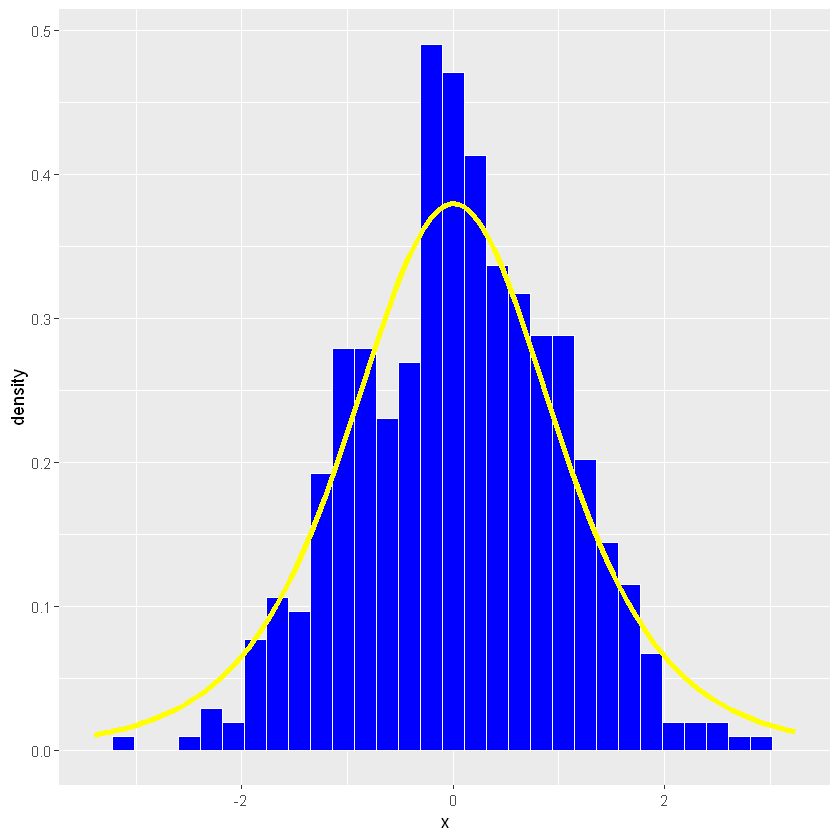

In [100]:
tibble(x = t_result) %>%
ggplot(aes(x = x)) + 
geom_histogram(aes(y = ..density..), fill = "blue", 
colour = "white") + 
stat_function(fun = dt, args = list(df = k), 
color = "yellow", xlim = extendrange(t_result), size = 1.5)